In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import json
import os
import numpy as np
import datetime

In [7]:
base = pd.read_csv('PETR4.SA.csv')
base

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-05-19,17.980000,18.040001,17.820000,17.940001,17.185019,25935900
1,2014-05-20,17.900000,18.379999,17.100000,17.299999,16.571949,54506300
2,2014-05-21,17.459999,17.820000,17.100000,17.459999,16.725214,40672100
3,2014-05-22,17.510000,17.770000,17.340000,17.680000,16.935957,32321300
4,2014-05-23,17.580000,17.830000,17.549999,17.700001,16.955118,18155800
...,...,...,...,...,...,...,...
1238,2019-05-10,26.870001,26.920000,26.420000,26.680000,26.680000,33336000
1239,2019-05-13,26.209999,26.469999,25.820000,25.900000,25.900000,43146100
1240,2019-05-14,26.170000,26.230000,25.850000,26.000000,26.000000,34968600
1241,2019-05-15,25.740000,25.889999,25.660000,25.879999,25.879999,37053900


In [9]:
from datetime import datetime
dateparse = lambda dates: datetime.strptime(dates, '%Y-%m-%d')
base = pd.read_csv('PETR4.SA.csv', parse_dates = ['Date'], index_col = 'Date', date_parser = dateparse)
base

/tmp/ipykernel_8223/1637719891.py:3: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  base = pd.read_csv('PETR4.SA.csv', parse_dates = ['Date'], index_col = 'Date', date_parser = dateparse)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-05-19,17.980000,18.040001,17.820000,17.940001,17.185019,25935900
2014-05-20,17.900000,18.379999,17.100000,17.299999,16.571949,54506300
2014-05-21,17.459999,17.820000,17.100000,17.459999,16.725214,40672100
2014-05-22,17.510000,17.770000,17.340000,17.680000,16.935957,32321300
2014-05-23,17.580000,17.830000,17.549999,17.700001,16.955118,18155800
...,...,...,...,...,...,...
2019-05-10,26.870001,26.920000,26.420000,26.680000,26.680000,33336000
2019-05-13,26.209999,26.469999,25.820000,25.900000,25.900000,43146100
2019-05-14,26.170000,26.230000,25.850000,26.000000,26.000000,34968600


In [10]:
base.drop(columns = ['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis = 1, inplace = True)
base

,Close
Date,
2014-05-19,17.940001
2014-05-20,17.299999
2014-05-21,17.459999
2014-05-22,17.680000
2014-05-23,17.700001
...,...
2019-05-10,26.680000
2019-05-13,25.900000
2019-05-14,26.000000


In [11]:
base_teste = base.copy()
base_teste.shape

(1243, 1)

In [16]:
base_treinamento = base.iloc[0:1243:]
base_treinamento

,Close
Date,
2014-05-19,17.940001
2014-05-20,17.299999
2014-05-21,17.459999
2014-05-22,17.680000
2014-05-23,17.700001
...,...
2019-05-10,26.680000
2019-05-13,25.900000
2019-05-14,26.000000


In [13]:
base_treinamento.index.min(), base_treinamento.index.max()

(Timestamp('2014-05-19 00:00:00'), Timestamp('2019-05-16 00:00:00'))

In [14]:
base_teste.index.min(), base_teste.index.max()

(Timestamp('2014-05-19 00:00:00'), Timestamp('2019-05-16 00:00:00'))

In [19]:
#dt_data_inicial = pd.Timestamp("2014-05-19", freq = 'D')
#dt_previsao_maxima = pd.Timestamp("2019-05-16", freq = 'D')

#faixa_treinamento = (dt_data_inicial, dt_data_final_treinamento)
#faixa_teste = (dt_data_inicial, dt_previsao_maxima)

dt_data_inicial = pd.Timestamp("2014-05-19")
dt_data_final_treinamento = pd.Timestamp("2019-04-03")
dt_previsao_maxima = pd.Timestamp("2019-05-16")


In [21]:
faixa_treinamento = pd.date_range(dt_data_inicial, dt_data_final_treinamento, freq='D')
faixa_teste = pd.date_range(dt_data_inicial, dt_previsao_maxima, freq='D')

In [32]:
faixa_treinamento

DatetimeIndex(['2014-05-19', '2014-05-20', '2014-05-21', '2014-05-22',
               '2014-05-23', '2014-05-24', '2014-05-25', '2014-05-26',
               '2014-05-27', '2014-05-28',
               ...
               '2019-03-25', '2019-03-26', '2019-03-27', '2019-03-28',
               '2019-03-29', '2019-03-30', '2019-03-31', '2019-04-01',
               '2019-04-02', '2019-04-03'],
              dtype='datetime64[ns]', length=1781, freq='D')

In [36]:
faixa_teste

DatetimeIndex(['2014-05-19', '2014-05-20', '2014-05-21', '2014-05-22',
               '2014-05-23', '2014-05-24', '2014-05-25', '2014-05-26',
               '2014-05-27', '2014-05-28',
               ...
               '2019-05-07', '2019-05-08', '2019-05-09', '2019-05-10',
               '2019-05-11', '2019-05-12', '2019-05-13', '2019-05-14',
               '2019-05-15', '2019-05-16'],
              dtype='datetime64[ns]', length=1824, freq='D')

In [40]:
serie_temporal_treinamento = []
serie_temporal_teste = []

serie_temporal_treinamento.append(base_treinamento[faixa_treinamento[0]:faixa_treinamento[1214]]['Close'])
serie_temporal_teste.append(base_teste[faixa_teste[0]:faixa_teste[1243]]['Close'])

In [41]:
serie_temporal_treinamento

[Date
 2014-05-19    17.940001
 2014-05-20    17.299999
 2014-05-21    17.459999
 2014-05-22    17.680000
 2014-05-23    17.700001
                 ...    
 2017-09-08    14.710000
 2017-09-11    14.990000
 2017-09-12    14.870000
 2017-09-13    15.030000
 2017-09-14    15.040000
 Name: Close, Length: 829, dtype: float64]

In [42]:
type(serie_temporal_treinamento), type(serie_temporal_teste)

(list, list)

In [43]:
serie_temporal_treinamento

[Date
 2014-05-19    17.940001
 2014-05-20    17.299999
 2014-05-21    17.459999
 2014-05-22    17.680000
 2014-05-23    17.700001
                 ...    
 2017-09-08    14.710000
 2017-09-11    14.990000
 2017-09-12    14.870000
 2017-09-13    15.030000
 2017-09-14    15.040000
 Name: Close, Length: 829, dtype: float64]

In [44]:
serie_temporal_teste

[Date
 2014-05-19    17.940001
 2014-05-20    17.299999
 2014-05-21    17.459999
 2014-05-22    17.680000
 2014-05-23    17.700001
                 ...    
 2017-10-09    15.890000
 2017-10-10    16.190001
 2017-10-11    16.080000
 2017-10-12    16.080000
 2017-10-13    16.080000
 Name: Close, Length: 850, dtype: float64]

In [45]:
len(serie_temporal_treinamento[0]), len(serie_temporal_teste[0])

(829, 850)

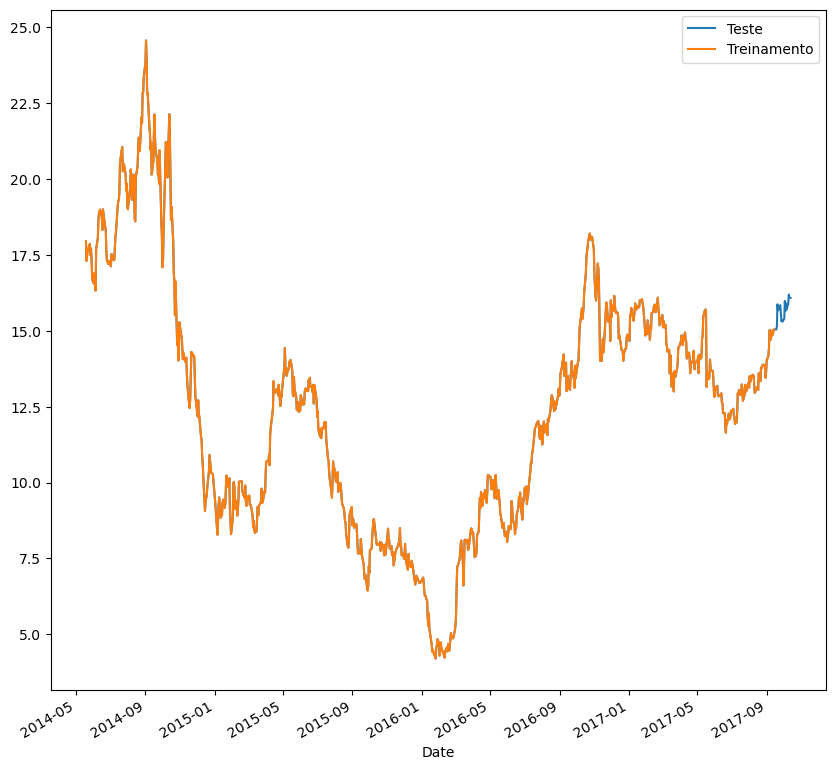

In [46]:
plt.figure(figsize=(10,10))
serie_temporal_teste[0].plot(label = "Teste")
serie_temporal_treinamento[0].plot(label = "Treinamento")
plt.legend()
plt.show()

In [47]:
def encode_target(ts):
    return [x if np.isfinite(x) else "NaN" for x in ts]

In [48]:
encode_target(serie_temporal_treinamento[0][0:5])

[17.940001, 17.299999, 17.459999, 17.68, 17.700001]

In [49]:
def series_to_obj(ts):
    obj = {"start": str(ts.index[0]), "target": encode_target(ts)}
    return obj

In [50]:
series_to_obj(serie_temporal_treinamento[0][0:5])

{'start': '2014-05-19 00:00:00',
 'target': [17.940001, 17.299999, 17.459999, 17.68, 17.700001]}

In [51]:
def series_to_jsonline(ts):
    return json.dumps(series_to_obj(ts))

In [52]:
series_to_jsonline(serie_temporal_treinamento[0][0:5])

'{"start": "2014-05-19 00:00:00", "target": [17.940001, 17.299999, 17.459999, 17.68, 17.700001]}'

In [53]:
encoding = 'utf-8'
arquivo_json_treinamento = 'train_petr.json'
arquivo_json_teste = 'test_petr.json'
with open(arquivo_json_treinamento, 'wb') as fp:
    for ts in serie_temporal_treinamento:
        fp.write(series_to_jsonline(ts).encode(encoding))
        fp.write('\n'.encode(encoding))

with open(arquivo_json_teste, 'wb') as fp:
    for ts in serie_temporal_teste:
        fp.write(series_to_jsonline(ts).encode(encoding))
        fp.write('\n'.encode(encoding))

In [67]:
import boto3
import sagemaker

In [68]:
session = sagemaker.Session()
role = sagemaker.get_execution_role()
job_name = 'deepar-petr'
bucket = 'grupo37fiapos'
subpasta_dataset = 'datasets/petr'
subpasta_modelo = 'modelos/petr/deepar'
s3_train_data = 's3://{}/{}/train/{}'.format(bucket, subpasta_dataset, 'train_petr.json')
s3_test_data = 's3://{}/{}/test/{}'.format(bucket, subpasta_dataset, 'test_petr.json')
output_location = 's3://{}/{}/output'.format(bucket, subpasta_modelo)

print('Role: {}'.format(role))
print('Localização da base de treinamento: {}'.format(s3_train_data))
print('Localização da base de teste: {}'.format(s3_test_data))
print('Modelo será salvo em: {}'.format(output_location))

Role: arn:aws:iam::554248764285:role/LabRole
Localização da base de treinamento: s3://grupo37fiapos/datasets/petr/train/train_petr.json
Localização da base de teste: s3://grupo37fiapos/datasets/petr/test/test_petr.json
Modelo será salvo em: s3://grupo37fiapos/modelos/petr/deepar/output


In [69]:
def escreve_s3(arquivo, bucket, nome):
    with open(arquivo, 'rb') as f:
        return boto3.Session().resource('s3').Bucket(bucket).Object(nome).upload_fileobj(f)

In [70]:
escreve_s3('train_petr.json', bucket, os.path.join(subpasta_dataset, 'train', 'train_petr.json'))
escreve_s3('test_petr.json', bucket, os.path.join(subpasta_dataset, 'test', 'test_petr.json'))

INFO:botocore.credentials:Found credentials from IAM Role: BaseNotebookInstanceEc2InstanceRole
INFO:botocore.credentials:Found credentials from IAM Role: BaseNotebookInstanceEc2InstanceRole


In [71]:
# https://docs.aws.amazon.com/sagemaker/latest/dg/ecr-sa-east-1.html
container = sagemaker.image_uris.retrieve(framework = 'forecasting-deepar', region = session.boto_region_name)

INFO:sagemaker.image_uris:Same images used for training and inference. Defaulting to image scope: inference.
INFO:sagemaker.image_uris:Defaulting to the only supported framework/algorithm version: 1.
INFO:sagemaker.image_uris:Ignoring unnecessary instance type: None.


In [73]:
# https://sagemaker.readthedocs.io/en/stable/api/training/estimators.html
# https://github.com/aws-samples/amazon-sagemaker-managed-spot-training/blob/main/xgboost_built_in_managed_spot_training_checkpointing/xgboost_built_in_managed_spot_training_checkpointing.ipynb
deepar = sagemaker.estimator.Estimator(image_uri = container,
                                       role = role,
                                       instance_count = 1,
                                       instance_type = 'ml.m5.large',
                                       output_path = output_location,
                                       sagemaker_session = session,
                                       base_job_name = job_name,
                                       use_spot_instances = True,
                                       max_run = 3600,
                                       max_wait = 3600)

In [75]:
# https://docs.aws.amazon.com/sagemaker/latest/dg/deepar_hyperparameters.html
freq = 'D'
prediction_length = 30
context_length = 30

In [76]:
hyperparametros = {
    'time_freq': freq,
    'epochs': "10",
    'context_length': str(context_length),
    'prediction_length': str(prediction_length)
}

In [77]:
deepar.set_hyperparameters(**hyperparametros)

In [78]:
data_channels = {'train': s3_train_data, 'test': s3_test_data}
data_channels

{'train': 's3://grupo37fiapos/datasets/petr/train/train_petr.json',
 'test': 's3://grupo37fiapos/datasets/petr/test/test_petr.json'}

In [79]:
deepar.fit(inputs = data_channels)

INFO:sagemaker:Creating training-job with name: deepar-petr-2024-09-30-19-29-46-391


2024-09-30 19:29:47 Starting - Starting the training job...
2024-09-30 19:30:02 Starting - Preparing the instances for training...
2024-09-30 19:30:30 Downloading - Downloading input data...
2024-09-30 19:31:01 Downloading - Downloading the training image...........Docker entrypoint called with argument(s): train
Running default environment configuration script
Running custom environment configuration script
/opt/amazon/lib/python3.8/site-packages/mxnet/model.py:97: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if num_device is 1 and 'dist' not in kvstore:
[09/30/2024 19:33:04 INFO 140111043700544] Reading default configuration from /opt/amazon/lib/python3.8/site-packages/algorithm/resources/default-input.json: {'_kvstore': 'auto', '_num_gpus': 'auto', '_num_kv_servers': 'auto', '_tuning_objective_metric': '', 'cardinality': 'auto', 'dropout_rate': '0.10', 'early_stopping_patience': '', 'embedding_dimension': '10', 'learning_rate': '0.001', 'likelihood': 'student-t', 'mini_b

# Deploy e previsões

In [80]:
job_name = deepar.latest_training_job.name
print('Job name: ', job_name)

Job name:  deepar-petr-2024-09-30-19-29-46-391


In [81]:
endpoint = session.endpoint_from_job(job_name = job_name,
                                     initial_instance_count = 1,
                                     instance_type = "ml.m5.large",
                                     image_uri = container,
                                     role = role)

INFO:sagemaker:Creating model with name: deepar-petr-2024-09-30-19-29-46-391
INFO:sagemaker:Creating endpoint-config with name deepar-petr-2024-09-30-19-29-46-391
INFO:sagemaker:Creating endpoint with name deepar-petr-2024-09-30-19-29-46-391


----------!

In [82]:
print('Endpoint: ', endpoint)

Endpoint:  deepar-petr-2024-09-30-19-29-46-391


In [84]:
class DeepARPredictor(sagemaker.predictor.Predictor):

    def set_prediction_parameters(self, freq, prediction_length):
        """Set the time frequency and prediction length parameters.
          This method **must** be called before being able to use `predict`.

        Parameters:
        freq -- string indicating the time frequency
        prediction_length -- integer, number of predicted time points

        Return value: none.
        """
        self.freq = freq
        self.prediction_length = prediction_length

    def predict(self, ts, cat=None, dynamic_feat=None,
                encoding="utf-8", num_samples=100, quantiles=["0.1", "0.5", "0.9"]):
        """Requests the prediction of for the time series listed in `ts`,
           each with the (optional) corresponding category listed in `cat`.

        Parameters:
        ts -- list of `pandas.Series` objects, the time series to predict
        cat -- list of integers (default: None)
        encoding -- string, encoding to use for the request (default: "utf-8")
        num_samples -- integer, number of samples to compute at prediction time (default: 100)
        quantiles -- list of strings specifying the quantiles to compute (default: ["0.1", "0.5", "0.9"])

        Return value: list of `pandas.DataFrame` objects, each containing the predictions
        """
        prediction_times = [x.index[-1] + datetime.timedelta(hours=1) for x in ts]

        req = self.__encode_request(ts, cat, dynamic_feat, encoding, num_samples, quantiles)
        res = super(DeepARPredictor, self).predict(req)
        return self.__decode_response(res, prediction_times, encoding)

    def __encode_request(self, ts, cat, dynamic_feat, encoding, num_samples, quantiles):

        instances = [series_to_obj(ts[k]) for k in range(len(ts))]

        configuration = {"num_samples": num_samples, "output_types": ["quantiles"], "quantiles": quantiles}
        http_request_data = {"instances": instances, "configuration": configuration}
        return json.dumps(http_request_data).encode(encoding)

    def __decode_response(self, response, prediction_times, encoding):
        response_data = json.loads(response.decode(encoding))
        list_of_df = []
        for k in range(len(prediction_times)):
            prediction_index = pd.date_range(start=prediction_times[k], freq=self.freq, periods=self.prediction_length)
            list_of_df.append(pd.DataFrame(data=response_data['predictions'][k]['quantiles'], index=prediction_index))
        return list_of_df

In [85]:
predictor = DeepARPredictor(endpoint_name = 'deepar-petr-2024-09-30-19-29-46-391',
                            sagemaker_session = session)
predictor.set_prediction_parameters(freq, prediction_length)
predictor.serializer.content_type = "application/json"

In [86]:
import datetime
previsoes = predictor.predict(serie_temporal_treinamento)

In [87]:
len(previsoes[0])

30

In [88]:
previsoes

[                           0.1        0.5        0.9
 2017-09-14 01:00:00  14.180793  15.148305  16.008142
 2017-09-15 01:00:00  14.317443  15.197432  15.905741
 2017-09-16 01:00:00  14.367135  15.287154  16.381117
 2017-09-17 01:00:00  14.680395  15.522368  16.361874
 2017-09-18 01:00:00  14.586409  15.543056  16.279129
 2017-09-19 01:00:00  14.734097  15.519370  16.341413
 2017-09-20 01:00:00  14.750218  15.596707  16.491175
 2017-09-21 01:00:00  15.189421  15.975567  16.904573
 2017-09-22 01:00:00  14.776892  16.118959  17.156345
 2017-09-23 01:00:00  15.257006  16.124050  17.408463
 2017-09-24 01:00:00  15.247048  16.025248  17.210464
 2017-09-25 01:00:00  14.857231  15.964072  17.232584
 2017-09-26 01:00:00  15.241796  16.212679  17.309847
 2017-09-27 01:00:00  14.913692  15.990914  17.035057
 2017-09-28 01:00:00  15.227200  16.231424  17.145126
 2017-09-29 01:00:00  15.033379  16.160521  17.139927
 2017-09-30 01:00:00  15.142875  16.423386  17.402534
 2017-10-01 01:00:00  15.337

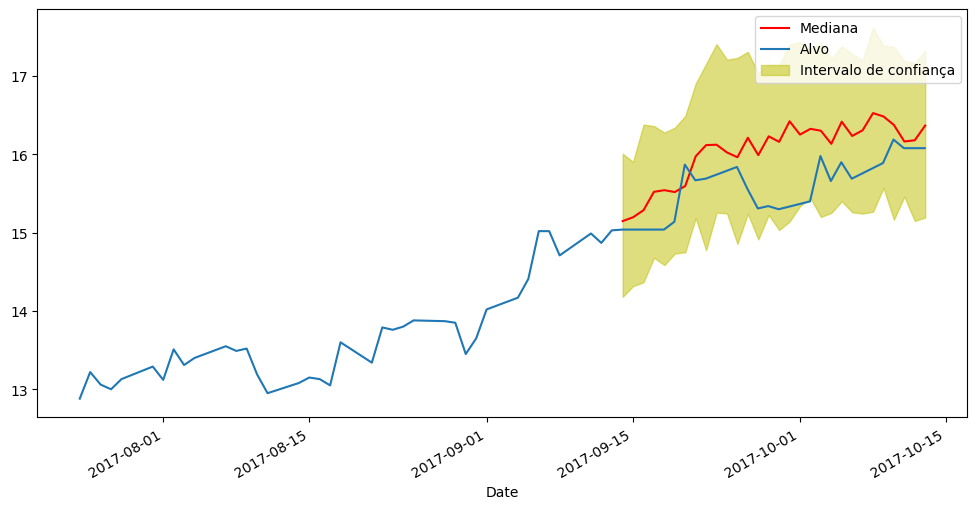

In [89]:
for k in range(len(previsoes)):
    plt.figure(figsize=(12,6))
    previsoes[k]['0.5'].plot(label = 'Mediana', color = 'red')
    #serie_temporal_teste[k].plot(label = 'Alvo')
    serie_temporal_teste[k][-prediction_length - context_length:].plot(label = 'Alvo')
    p10 = previsoes[k]['0.1']
    p90 = previsoes[k]['0.9']
    plt.fill_between(p10.index, p10, p90, color = 'y', alpha = 0.5, label = 'Intervalo de confiança')
    plt.legend()
    plt.show()